In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
file_path = "BCA_MDA_ZONALPRICES.csv"

In [3]:
df = pd.read_csv(file_path, parse_dates=[2])
df.head()

,SYSTEM,ZONE,DATE,HOUR,MDA LMP,MDA ENERGY COST,MDA LOSSES COST,MDA CONGESTION COST
0,BCA,ENSENADA,2016-01-27,1,336.45,325.20,11.25,0.0
1,BCA,ENSENADA,2016-01-27,2,335.11,324.06,11.05,0.0
2,BCA,ENSENADA,2016-01-27,3,334.48,323.35,11.13,0.0
3,BCA,ENSENADA,2016-01-27,4,336.43,323.06,13.37,0.0
4,BCA,ENSENADA,2016-01-27,5,335.06,323.68,11.38,0.0


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')
df['MD LMP'] = pd.to_numeric(df['MDA LMP'])

In [5]:
ENSENADA_df = df.loc[df['ZONE'] == 'ENSENADA', ['DATE','MDA LMP']] 
MEXICALI_df = df.loc[df['ZONE'] == 'MEXICALI', ['DATE','MDA LMP']] 
TIJUANA_df = df.loc[df['ZONE'] == 'TIJUANA', ['DATE','MDA LMP']] 
SANLUIS_df = df.loc[df['ZONE'] == 'SANLUIS', ['DATE','MDA LMP']] 

In [32]:
ENSENADA_series = pd.Series(ENSENADA_df['MDA LMP'])
MEXICALI_series = pd.Series(MEXICALI_df['MDA LMP'])
TIJUANA_series = pd.Series(TIJUANA_df['MDA LMP'])
SANLUIS_series = pd.Series(SANLUIS_df['MDA LMP'])

In [33]:
ENSENADA_values = ENSENADA_series.values
MEXICALI_values = MEXICALI_series.values
TIJUANA_values = TIJUANA_series.values
SANLUIS_values = SANLUIS_series.values

In [42]:
ENSENADA_train, ENSENADA_test = ENSENADA_values[0:22870], ENSENADA_values[22870:len(ENSENADA_values)]
MEXICALI_train, MEXICALI_test = MEXICALI_values[0:22870], MEXICALI_values[22870:len(MEXICALI_values)]
TIJUANA_train, TIJUANA_test = TIJUANA_values[0:22870], TIJUANA_values[22870:len(TIJUANA_values)]
SANLUIS_train, SANLUIS_test = SANLUIS_values[0:22870], SANLUIS_values[22870:len(SANLUIS_values)]

predicted=650.814801, expected=634.690000
predicted=636.674577, expected=404.200000
predicted=432.625599, expected=389.540000
predicted=394.810043, expected=346.560000
predicted=352.459466, expected=340.710000
predicted=342.146698, expected=341.870000
predicted=341.904074, expected=342.670000
predicted=342.576631, expected=344.950000
predicted=344.660205, expected=402.760000
predicted=395.659679, expected=440.150000
predicted=434.715189, expected=520.380000
predicted=509.914857, expected=737.430000
predicted=709.632909, expected=753.290000
predicted=747.970942, expected=985.680000
predicted=956.648708, expected=960.630000
predicted=960.170404, expected=1270.740000
predicted=1232.814695, expected=1161.740000
predicted=1170.464616, expected=1160.860000
predicted=1162.070243, expected=1730.310000
predicted=1660.902520, expected=1533.710000
predicted=1549.312169, expected=2282.190000
predicted=2192.664422, expected=1694.600000
predicted=1755.584569, expected=1881.450000
predicted=1866.1192

predicted=692.386778, expected=624.040000
predicted=632.419462, expected=399.750000
predicted=428.235133, expected=396.940000
predicted=400.773722, expected=392.230000
predicted=393.278318, expected=393.130000
predicted=393.150619, expected=394.970000
predicted=394.749819, expected=395.010000
predicted=394.980687, expected=396.010000
predicted=395.886579, expected=403.600000
predicted=402.658678, expected=645.190000
predicted=615.514255, expected=646.210000
predicted=642.465742, expected=995.120000
predicted=951.980585, expected=1034.220000
predicted=1024.183843, expected=1072.570000
predicted=1066.679267, expected=1030.450000
predicted=1034.914600, expected=1133.590000
predicted=1121.546367, expected=1030.930000
predicted=1042.051873, expected=1105.070000
predicted=1097.389605, expected=705.510000
predicted=753.495627, expected=1537.480000
predicted=1441.525946, expected=1229.760000
predicted=1255.734936, expected=705.060000
predicted=772.521784, expected=693.640000
predicted=703.3160

predicted=515.140151, expected=391.570000
predicted=407.377122, expected=299.050000
predicted=312.903339, expected=282.320000
predicted=286.229311, expected=284.120000
predicted=284.387552, expected=282.930000
predicted=283.114119, expected=278.610000
predicted=279.183583, expected=276.850000
predicted=277.145902, expected=317.330000
predicted=312.189711, expected=511.890000
predicted=486.356500, expected=515.930000
predicted=512.155250, expected=966.440000
predicted=908.368019, expected=909.790000
predicted=909.632417, expected=910.050000
predicted=910.021245, expected=945.280000
predicted=940.796883, expected=1050.520000
predicted=1036.518141, expected=1148.290000
predicted=1134.030530, expected=1101.110000
predicted=1105.352922, expected=525.520000
predicted=599.681294, expected=1413.360000
predicted=1309.286710, expected=1112.120000
predicted=1137.386691, expected=525.410000
predicted=603.741584, expected=506.680000
predicted=519.108340, expected=382.380000
predicted=399.879038, ex

predicted=568.377086, expected=367.400000
predicted=393.140557, expected=338.940000
predicted=345.881621, expected=340.540000
predicted=341.224312, expected=335.790000
predicted=336.485940, expected=332.330000
predicted=332.862073, expected=305.300000
predicted=308.828506, expected=313.480000
predicted=312.883333, expected=318.860000
predicted=318.093824, expected=565.670000
predicted=533.973019, expected=586.190000
predicted=579.513327, expected=570.320000
predicted=571.507278, expected=586.370000
predicted=584.477252, expected=589.380000
predicted=588.762893, expected=1015.910000
predicted=961.235972, expected=587.170000
predicted=635.094188, expected=583.930000
predicted=590.494402, expected=580.190000
predicted=581.520320, expected=586.930000
predicted=586.247754, expected=580.490000
predicted=581.237909, expected=582.640000
predicted=582.470900, expected=564.450000
predicted=566.768024, expected=550.860000
predicted=552.906818, expected=543.990000
predicted=545.141013, expected=33

predicted=104.684262, expected=104.010000
predicted=104.088120, expected=339.620000
predicted=308.901608, expected=343.740000
predicted=339.196485, expected=348.340000
predicted=347.147982, expected=352.260000
predicted=351.593950, expected=357.460000
predicted=356.695834, expected=380.740000
predicted=377.606021, expected=380.900000
predicted=380.472258, expected=544.860000
predicted=523.429346, expected=545.030000
predicted=542.221556, expected=373.150000
predicted=395.201967, expected=544.860000
predicted=525.349935, expected=376.680000
predicted=396.072291, expected=355.750000
predicted=361.010061, expected=377.350000
predicted=375.220584, expected=636.230000
predicted=602.199915, expected=590.480000
predicted=592.019103, expected=372.560000
predicted=401.185256, expected=352.950000
predicted=359.241982, expected=343.990000
predicted=345.979624, expected=342.500000
predicted=342.954103, expected=210.400000
predicted=227.683221, expected=340.380000
predicted=325.681394, expected=345

predicted=415.138250, expected=452.730000
predicted=447.816600, expected=455.880000
predicted=454.830009, expected=454.990000
predicted=454.974033, expected=666.820000
predicted=639.117188, expected=666.930000
predicted=663.304875, expected=458.820000
predicted=485.578903, expected=459.960000
predicted=463.317152, expected=661.560000
predicted=635.636369, expected=676.900000
predicted=671.515415, expected=661.000000
predicted=662.389359, expected=455.360000
predicted=482.451605, expected=669.200000
predicted=644.779816, expected=709.260000
predicted=700.838968, expected=684.760000
predicted=686.878317, expected=455.870000
predicted=486.100056, expected=449.280000
predicted=454.102331, expected=443.450000
predicted=444.848249, expected=431.720000
predicted=433.441677, expected=416.670000
predicted=418.867742, expected=161.120000
predicted=194.835632, expected=160.390000
predicted=164.889491, expected=160.050000
predicted=160.675812, expected=408.910000
predicted=376.435062, expected=441

predicted=479.627561, expected=808.060000
predicted=764.953528, expected=835.910000
predicted=826.613776, expected=924.960000
predicted=912.071331, expected=938.470000
predicted=935.028771, expected=484.300000
predicted=543.489325, expected=1179.420000
predicted=1095.926060, expected=530.760000
predicted=605.032147, expected=490.150000
predicted=505.251851, expected=801.510000
predicted=762.598243, expected=937.030000
predicted=914.134349, expected=717.220000
predicted=743.111874, expected=483.840000
predicted=517.914877, expected=557.640000
predicted=552.429461, expected=453.870000
predicted=466.825895, expected=448.030000
predicted=450.504553, expected=445.590000
predicted=446.240345, expected=444.020000
predicted=444.316237, expected=441.780000
predicted=442.117652, expected=445.580000
predicted=445.129576, expected=169.220000
predicted=205.468461, expected=449.400000
predicted=417.349095, expected=456.210000
predicted=451.107980, expected=452.880000
predicted=452.651939, expected=4

predicted=512.122285, expected=514.470000
predicted=514.168040, expected=513.570000
predicted=513.656098, expected=510.980000
predicted=511.339768, expected=530.770000
predicted=528.218170, expected=717.180000
predicted=692.300874, expected=688.310000
predicted=688.850141, expected=528.370000
predicted=549.520467, expected=519.910000
predicted=523.818727, expected=481.280000
predicted=486.890258, expected=506.720000
predicted=504.114594, expected=1136.180000
predicted=1052.942515, expected=608.360000
predicted=666.959047, expected=565.540000
predicted=578.915115, expected=537.100000
predicted=542.618901, expected=537.320000
predicted=538.026638, expected=330.630000
predicted=357.961335, expected=524.300000
predicted=502.386296, expected=526.480000
predicted=523.312408, expected=745.840000
predicted=716.530461, expected=461.680000
predicted=495.273359, expected=482.980000
predicted=484.606480, expected=684.810000
predicted=658.437782, expected=772.550000
predicted=757.528486, expected=7

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=417.851007, expected=585.140000
predicted=563.091235, expected=603.010000
predicted=597.757129, expected=564.680000
predicted=569.050951, expected=329.390000
predicted=360.991507, expected=599.510000
predicted=568.067790, expected=635.310000
predicted=626.455065, expected=283.420000
predicted=328.654946, expected=288.160000
predicted=293.498323, expected=159.750000
predicted=177.380048, expected=155.790000
predicted=158.629727, expected=155.830000
predicted=156.191787, expected=159.880000
predicted=159.386380, expected=633.710000
predicted=571.173934, expected=652.160000
predicted=641.494004, expected=579.180000
predicted=587.406827, expected=571.620000
predicted=573.711425, expected=601.720000
predicted=598.037610, expected=574.470000
predicted=577.587475, expected=624.100000
predicted=617.978529, expected=625.050000
predicted=624.129358, expected=662.100000
predicted=657.106436, expected=700.960000
predicted=695.192276, expected=662.120000
predicted=666.494379, expected=650

predicted=510.958433, expected=445.210000
predicted=453.932658, expected=413.200000
predicted=418.604260, expected=398.380000
predicted=401.064259, expected=294.040000
predicted=308.229511, expected=296.490000
predicted=298.045073, expected=224.670000
predicted=234.394774, expected=224.270000
predicted=225.607996, expected=371.380000
predicted=352.052447, expected=359.600000
predicted=358.600044, expected=525.450000
predicted=503.334012, expected=477.140000
predicted=480.618835, expected=582.460000
predicted=568.966179, expected=605.390000
predicted=600.571216, expected=628.490000
predicted=624.799955, expected=1181.360000
predicted=1107.598360, expected=595.360000
predicted=663.311003, expected=602.100000
predicted=610.229902, expected=609.120000
predicted=609.278389, expected=595.550000
predicted=597.381473, expected=623.540000
predicted=620.082105, expected=642.140000
predicted=639.226731, expected=632.560000
predicted=633.456319, expected=625.740000
predicted=626.775280, expected=6

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1050.558066, expected=903.140000
predicted=922.707929, expected=596.890000
predicted=640.094665, expected=559.170000
predicted=569.907003, expected=519.650000
predicted=526.319802, expected=579.940000
predicted=572.841683, expected=521.160000
predicted=528.018707, expected=512.290000
predicted=514.382262, expected=466.260000
predicted=472.644676, expected=487.180000
predicted=485.259244, expected=443.900000
predicted=449.387189, expected=482.990000
predicted=478.541347, expected=628.600000
predicted=608.719100, expected=612.510000
predicted=612.018514, expected=592.030000
predicted=594.690141, expected=600.420000
predicted=599.671117, expected=598.040000
predicted=598.266814, expected=600.500000
predicted=600.214644, expected=599.010000
predicted=599.180320, expected=600.160000
predicted=600.040801, expected=604.230000
predicted=603.685491, expected=813.350000
predicted=785.574924, expected=951.810000
predicted=929.798794, expected=1397.470000
predicted=1335.526039, expected=

predicted=716.654479, expected=574.610000
predicted=593.526985, expected=510.710000
predicted=521.740533, expected=514.430000
predicted=515.410302, expected=519.760000
predicted=519.188398, expected=483.680000
predicted=488.412309, expected=487.610000
predicted=487.722894, expected=533.210000
predicted=527.163278, expected=687.210000
predicted=665.920980, expected=992.570000
predicted=949.120885, expected=765.960000
predicted=790.356442, expected=935.220000
predicted=915.961417, expected=578.730000
predicted=623.630937, expected=928.870000
predicted=888.256941, expected=944.340000
predicted=936.897817, expected=937.680000
predicted=937.599965, expected=936.430000
predicted=936.609854, expected=920.850000
predicted=922.971612, expected=807.790000
predicted=823.143232, expected=930.960000
predicted=916.629972, expected=2032.600000
predicted=1884.114606, expected=953.540000
predicted=1077.578863, expected=980.180000
predicted=993.186843, expected=887.090000
predicted=901.252664, expected=

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=859.322269, expected=1182.900000
predicted=1139.845261, expected=1540.560000
predicted=1487.257136, expected=1704.600000
predicted=1675.721658, expected=1556.130000
predicted=1572.099656, expected=1554.150000
predicted=1556.588434, expected=1450.850000
predicted=1464.971511, expected=1236.340000
predicted=1266.812672, expected=1153.280000
predicted=1168.426246, expected=1026.300000
predicted=1045.247041, expected=1026.050000
predicted=1028.633122, expected=877.510000
predicted=897.648475, expected=859.980000
predicted=865.015257, expected=885.330000
predicted=882.647789, expected=1087.000000
predicted=1059.827772, expected=1301.140000
predicted=1269.058605, expected=1539.550000
predicted=1503.597689, expected=1717.580000
predicted=1689.158252, expected=1168.270000
predicted=1237.635059, expected=1055.220000
predicted=1079.525697, expected=1084.970000
predicted=1084.275496, expected=1566.930000
predicted=1502.741677, expected=1886.540000
predicted=1835.535180, expected=1726.64

predicted=761.571710, expected=974.580000
predicted=946.270377, expected=2778.080000
predicted=2534.568804, expected=2411.290000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2427.760673, expected=2407.950000
predicted=2410.667677, expected=2002.890000
predicted=2057.201636, expected=1536.550000
predicted=1605.837902, expected=801.210000
predicted=908.167300, expected=675.110000
predicted=706.087878, expected=627.220000
predicted=637.710820, expected=620.150000
predicted=622.494649, expected=616.350000
predicted=617.177567, expected=615.230000
predicted=615.499843, expected=616.560000
predicted=616.430251, expected=672.440000
predicted=665.011221, expected=911.240000
predicted=878.546607, expected=1311.490000
predicted=1254.012314, expected=1976.680000
predicted=1880.783294, expected=1823.000000
predicted=1830.731231, expected=1624.810000
predicted=1652.207936, expected=1793.000000
predicted=1774.359876, expected=1792.070000
predicted=1789.775608, expected=791.600000
predicted=924.188294, expected=760.370000
predicted=782.136396, expected=667.610000
predicted=682.829646, expected=861.010000
predicted=837.371645, expected=1180.700000
predicted=1135

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=572.985140, expected=645.380000
predicted=635.774785, expected=1460.940000
predicted=1351.373949, expected=940.710000
predicted=995.301278, expected=999.240000
predicted=998.743159, expected=1029.210000
predicted=1025.188565, expected=1000.320000
predicted=1003.651139, expected=643.590000
predicted=691.451643, expected=643.690000
predicted=650.049356, expected=636.570000
predicted=638.373179, expected=914.750000
predicted=878.044954, expected=1088.060000
predicted=1060.182850, expected=1093.020000
predicted=1088.686425, expected=1062.390000
predicted=1065.912967, expected=1003.400000
predicted=1011.733126, expected=812.560000
predicted=839.044475, expected=566.480000
predicted=602.704010, expected=519.880000
predicted=530.891622, expected=497.780000
predicted=502.185728, expected=619.080000
predicted=603.560191, expected=1026.270000
predicted=970.137814, expected=655.700000
predicted=697.493286, expected=659.080000
predicted=664.197224, expected=494.290000
predicted=516.87277

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=985.668740, expected=1554.440000
predicted=1478.904106, expected=817.480000
predicted=905.432744, expected=662.250000
predicted=694.587723, expected=522.980000
predicted=545.797379, expected=445.070000
predicted=458.462642, expected=527.150000
predicted=518.027850, expected=499.700000
predicted=502.142504, expected=329.970000
predicted=352.854585, expected=262.920000
predicted=274.870841, expected=336.020000
predicted=327.892355, expected=427.000000
predicted=413.830553, expected=457.750000
predicted=451.917175, expected=420.010000
predicted=424.254217, expected=307.750000
predicted=323.234024, expected=491.570000
predicted=469.201362, expected=507.390000
predicted=502.320713, expected=821.760000
predicted=779.321190, expected=821.060000
predicted=815.531423, expected=134.640000
predicted=225.137186, expected=162.930000
predicted=171.191269, expected=433.080000
predicted=398.273414, expected=656.330000
predicted=622.044283, expected=616.320000
predicted=617.091672, expected=5

predicted=422.169194, expected=205.130000
predicted=233.969436, expected=210.320000
predicted=213.458207, expected=208.030000
predicted=208.746384, expected=186.930000
predicted=189.823524, expected=178.570000
predicted=180.059409, expected=148.740000
predicted=152.894968, expected=258.720000
predicted=244.652818, expected=313.040000
predicted=303.950457, expected=239.170000
predicted=247.775408, expected=123.380000
predicted=139.903609, expected=183.040000
predicted=177.301311, expected=120.830000
predicted=128.326511, expected=56.200000
predicted=65.774599, expected=39.520000
predicted=42.997612, expected=66.740000
predicted=63.574111, expected=99.180000
predicted=94.438703, expected=335.170000
predicted=303.177394, expected=410.050000
predicted=395.850253, expected=404.260000
predicted=403.144989, expected=405.390000
predicted=405.094351, expected=550.550000
predicted=531.228468, expected=398.600000
predicted=416.227998, expected=309.940000
predicted=324.064015, expected=338.690000


predicted=274.097714, expected=273.640000
predicted=273.698356, expected=308.010000
predicted=303.453327, expected=384.540000
predicted=373.775981, expected=436.240000
predicted=427.950567, expected=338.070000
predicted=350.003445, expected=169.660000
predicted=193.597316, expected=125.770000
predicted=134.766986, expected=81.300000
predicted=88.388633, expected=26.820000
predicted=34.982061, expected=4.990000
predicted=8.958994, expected=-2.530000
predicted=-1.017852, expected=15.610000
predicted=13.389949, expected=232.570000
predicted=203.466968, expected=402.650000
predicted=376.209992, expected=490.890000
predicted=475.672095, expected=523.260000
predicted=516.949916, expected=444.820000
predicted=454.399455, expected=413.800000
predicted=419.192649, expected=465.540000
predicted=459.392420, expected=322.520000
predicted=340.689489, expected=355.770000
predicted=353.768893, expected=310.390000
predicted=316.147604, expected=327.770000
predicted=326.226802, expected=324.830000
pred

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=454.205321, expected=453.460000
predicted=453.563471, expected=454.640000
predicted=454.501673, expected=560.520000
predicted=546.455176, expected=835.330000
predicted=797.003725, expected=769.830000
predicted=773.453614, expected=626.810000
predicted=646.287102, expected=573.280000
predicted=582.980314, expected=453.890000
predicted=471.029875, expected=548.880000
predicted=538.554474, expected=1300.860000
predicted=1199.714127, expected=558.070000
predicted=643.290855, expected=541.620000
predicted=555.130491, expected=541.930000
predicted=543.691148, expected=566.420000
predicted=563.410346, expected=535.780000
predicted=539.457225, expected=628.870000
predicted=617.006570, expected=446.180000
predicted=468.871766, expected=445.920000
predicted=448.972584, expected=451.770000
predicted=451.402956, expected=460.510000
predicted=459.305293, expected=552.060000
predicted=539.749586, expected=544.800000
predicted=544.137248, expected=558.940000
predicted=556.982656, expected=5

predicted=1508.552442, expected=2088.470000
predicted=2011.644844, expected=4967.410000
predicted=4576.628047, expected=1878.750000
predicted=2238.872834, expected=1649.950000
predicted=1728.520849, expected=1404.210000
predicted=1447.506930, expected=1229.500000
predicted=1258.610935, expected=1153.630000
predicted=1167.663075, expected=1007.130000
predicted=1028.565925, expected=784.840000
predicted=817.360954, expected=784.500000
predicted=788.899688, expected=784.600000
predicted=785.190663, expected=1027.370000
predicted=995.099248, expected=1100.740000
predicted=1086.681454, expected=1362.230000
predicted=1325.525105, expected=1356.610000
predicted=1352.503917, expected=914.700000
predicted=973.104850, expected=822.970000
predicted=843.007760, expected=1260.080000
predicted=1204.496301, expected=1178.430000
predicted=1181.938111, expected=1162.040000
predicted=1164.725341, expected=1196.040000
predicted=1191.896932, expected=1187.500000
predicted=1188.119043, expected=1164.560000

predicted=1017.746227, expected=1075.230000
predicted=1067.614948, expected=1227.630000
predicted=1206.388439, expected=1521.800000
predicted=1479.911156, expected=1865.760000
predicted=1814.528695, expected=2620.480000
predicted=2513.483858, expected=1717.320000
predicted=1823.237560, expected=1594.860000
predicted=1625.271314, expected=1423.760000
predicted=1450.591892, expected=1315.340000
predicted=1333.358117, expected=1238.890000
predicted=1251.483152, expected=1136.770000
predicted=1152.050378, expected=869.380000
predicted=906.976291, expected=856.500000
predicted=863.229745, expected=850.150000
predicted=851.908318, expected=838.190000
predicted=840.032718, expected=858.500000
predicted=856.065081, expected=1395.510000
predicted=1323.843131, expected=1340.910000
predicted=1338.679371, expected=1219.410000
predicted=1235.297911, expected=1012.310000
predicted=1041.976256, expected=969.430000
predicted=979.097157, expected=897.360000
predicted=908.245919, expected=863.700000
pre

predicted=1002.146642, expected=1008.840000
predicted=1007.978551, expected=1166.050000
predicted=1145.135817, expected=1248.680000
predicted=1234.994437, expected=1505.800000
predicted=1469.962900, expected=1609.950000
predicted=1591.451139, expected=1512.020000
predicted=1522.588553, expected=1424.500000
predicted=1437.537362, expected=1304.260000
predicted=1321.954766, expected=1237.740000
predicted=1248.931749, expected=1092.500000
predicted=1113.253720, expected=908.280000
predicted=935.456609, expected=850.400000
predicted=861.687578, expected=821.100000
predicted=826.495278, expected=814.000000
predicted=815.673447, expected=820.070000
predicted=819.505886, expected=880.700000
predicted=872.613834, expected=1333.730000
predicted=1272.683107, expected=1359.270000
predicted=1347.839095, expected=1051.990000
predicted=1091.208589, expected=1164.450000
predicted=1154.779014, expected=1080.560000
predicted=1090.420347, expected=1125.180000
predicted=1120.605095, expected=1080.640000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=682.497270, expected=2066.670000
predicted=1883.815737, expected=2066.410000
predicted=2042.359832, expected=1291.490000
predicted=1390.754323, expected=1109.820000
predicted=1146.963983, expected=1070.780000
predicted=1080.872773, expected=1043.330000
predicted=1048.316612, expected=978.020000
predicted=987.331412, expected=994.820000
predicted=993.855491, expected=993.570000
predicted=993.632455, expected=1105.950000
predicted=1091.140138, expected=1561.650000
predicted=1499.539016, expected=2052.940000
predicted=1979.924749, expected=2361.530000
predicted=2311.229184, expected=2215.080000
predicted=2227.844395, expected=2118.940000
predicted=2133.385543, expected=1755.590000
predicted=1805.520043, expected=1616.400000
predicted=1641.413144, expected=1581.030000
predicted=1589.047805, expected=2377.410000
predicted=2273.409373, expected=1326.650000
predicted=1451.780085, expected=1195.510000
predicted=1229.393600, expected=1181.690000
predicted=1188.023633, expected=1085.95

predicted=966.108953, expected=947.760000
predicted=950.110419, expected=971.350000
predicted=968.679578, expected=1110.050000
predicted=1092.146542, expected=1540.220000
predicted=1483.433299, expected=2062.960000
predicted=1989.548332, expected=2484.410000
predicted=2421.776531, expected=2108.230000
predicted=2148.041388, expected=1542.280000
predicted=1619.101024, expected=1405.360000
predicted=1432.484087, expected=1387.820000
predicted=1393.519152, expected=1391.600000
predicted=1391.882670, expected=1388.850000
predicted=1389.273641, expected=1608.620000
predicted=1580.872296, expected=1691.670000
predicted=1677.680888, expected=1985.870000
predicted=1946.881782, expected=2374.030000
predicted=2319.993920, expected=2722.100000
predicted=2671.262742, expected=2528.810000
predicted=2546.934661, expected=2528.310000
predicted=2530.751082, expected=2208.910000
predicted=2249.745124, expected=1964.020000
predicted=2000.266468, expected=1660.480000
predicted=1703.555218, expected=1061.

predicted=2328.490327, expected=1462.820000
predicted=1569.664438, expected=1406.720000
predicted=1426.857439, expected=1307.770000
predicted=1322.495364, expected=1318.460000
predicted=1318.994296, expected=1393.480000
predicted=1384.331460, expected=1750.310000
predicted=1705.220773, expected=2091.450000
predicted=2043.885758, expected=1979.750000
predicted=1987.720113, expected=1586.240000
predicted=1635.799053, expected=1340.940000
predicted=1377.334363, expected=1277.260000
predicted=1289.633998, expected=1261.780000
predicted=1265.248787, expected=1261.270000
predicted=1261.794926, expected=1223.660000
predicted=1228.394935, expected=1282.580000
predicted=1275.934149, expected=1391.810000
predicted=1377.561834, expected=1702.110000
predicted=1662.146577, expected=2204.090000
predicted=2137.359825, expected=3111.610000
predicted=2991.724209, expected=2455.010000
predicted=2521.231378, expected=2274.810000
predicted=2305.251242, expected=2099.290000
predicted=2124.736511, expected=

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1193.717406, expected=1685.910000
predicted=1625.349955, expected=2193.440000
predicted=2123.582633, expected=2696.800000
predicted=2626.366162, expected=2462.530000
predicted=2482.767475, expected=2330.160000
predicted=2349.012395, expected=2065.570000
predicted=2100.509538, expected=1674.550000
predicted=1727.001008, expected=1315.710000
predicted=1366.329263, expected=1404.950000
predicted=1400.239981, expected=1270.330000
predicted=1286.342514, expected=1217.770000
predicted=1226.236498, expected=1180.190000
predicted=1185.884570, expected=1148.600000
predicted=1153.215742, expected=1148.420000
predicted=1149.039943, expected=1114.970000
predicted=1119.189102, expected=1178.810000
predicted=1171.508471, expected=1149.180000
predicted=1151.956258, expected=1182.920000
predicted=1179.143149, expected=1058.410000
predicted=1073.285791, expected=896.730000
predicted=918.464864, expected=847.370000
predicted=856.132600, expected=863.600000
predicted=862.701200, expected=1017.1

predicted=724.170958, expected=778.370000
predicted=771.761798, expected=494.430000
predicted=528.333206, expected=815.020000
predicted=779.993705, expected=981.150000
predicted=956.586242, expected=892.530000
predicted=900.380105, expected=825.060000
predicted=834.284666, expected=814.130000
predicted=816.611193, expected=638.580000
predicted=660.352243, expected=477.810000
predicted=500.126707, expected=506.170000
predicted=505.437712, expected=491.260000
predicted=492.998590, expected=468.860000
predicted=471.815262, expected=455.780000
predicted=457.744343, expected=515.590000
predicted=508.526312, expected=739.600000
predicted=711.371831, expected=860.510000
predicted=842.301826, expected=751.200000
predicted=762.349715, expected=761.750000
predicted=761.839005, expected=781.700000
predicted=779.288942, expected=793.540000
predicted=791.815019, expected=799.720000
predicted=798.770878, expected=800.230000
predicted=800.068722, expected=808.780000
predicted=807.732671, expected=120

predicted=903.267060, expected=828.600000
predicted=837.716821, expected=1012.300000
predicted=991.050013, expected=2133.660000
predicted=1994.522461, expected=1844.040000
predicted=1862.427884, expected=970.760000
predicted=1079.439305, expected=800.040000
predicted=834.088398, expected=682.410000
predicted=700.897745, expected=436.720000
predicted=468.899766, expected=405.130000
predicted=412.899362, expected=373.910000
predicted=378.660074, expected=372.230000
predicted=373.014474, expected=456.000000
predicted=445.897229, expected=626.140000
predicted=604.198507, expected=763.800000
predicted=744.378300, expected=812.210000
predicted=803.966493, expected=692.730000
predicted=706.290032, expected=772.590000
predicted=764.531522, expected=793.560000
predicted=790.041369, expected=749.620000
predicted=754.557885, expected=703.700000
predicted=709.907270, expected=778.250000
predicted=769.942866, expected=843.500000
predicted=834.560194, expected=816.410000
predicted=818.637946, expect

predicted=1642.842187, expected=1399.500000
predicted=1429.073709, expected=1326.750000
predicted=1339.207341, expected=710.630000
predicted=786.940036, expected=669.680000
predicted=683.923055, expected=659.970000
predicted=662.888890, expected=413.470000
predicted=443.743416, expected=386.240000
predicted=393.220607, expected=384.160000
predicted=385.261380, expected=386.970000
predicted=386.764477, expected=636.490000
predicted=606.193693, expected=682.550000
predicted=673.295993, expected=1306.930000
predicted=1230.075239, expected=1127.750000
predicted=1140.195536, expected=702.730000
predicted=755.832878, expected=732.270000
predicted=735.144003, expected=703.220000
predicted=707.107444, expected=693.600000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=695.252170, expected=689.540000
predicted=690.246016, expected=753.760000
predicted=746.067412, expected=907.800000
predicted=888.193941, expected=1017.950000
predicted=1002.228865, expected=1073.100000
predicted=1064.526633, expected=698.820000
predicted=743.212658, expected=1619.690000
predicted=1513.330804, expected=1335.620000
predicted=1357.232448, expected=1269.490000
predicted=1280.178300, expected=695.280000
predicted=766.310297, expected=663.930000
predicted=676.371332, expected=938.770000
predicted=906.932739, expected=683.260000
predicted=710.431491, expected=672.970000
predicted=677.531023, expected=668.420000
predicted=669.538351, expected=668.770000
predicted=668.875351, expected=669.120000
predicted=669.102357, expected=1356.740000
predicted=1273.281660, expected=1320.040000
predicted=1314.398366, expected=972.520000
predicted=1014.055634, expected=722.240000
predicted=757.682846, expected=700.480000
predicted=707.438054, expected=651.020000
predicted=657.88089

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=177.881881, expected=178.980000
predicted=178.841433, expected=203.530000
predicted=200.537644, expected=204.100000
predicted=203.664131, expected=203.530000
predicted=203.541432, expected=208.660000
predicted=208.035993, expected=452.660000
predicted=423.062407, expected=967.750000
predicted=901.872998, expected=729.090000
predicted=750.010076, expected=523.750000
predicted=551.134204, expected=236.990000
predicted=274.993690, expected=247.270000
predicted=250.621080, expected=339.460000
predicted=328.711778, expected=228.570000
predicted=240.682036, expected=176.770000
predicted=184.496826, expected=169.560000
predicted=171.361185, expected=176.660000
predicted=176.013156, expected=283.670000
predicted=270.643000, expected=495.800000
predicted=468.565550, expected=531.130000
predicted=523.567845, expected=293.800000
predicted=321.596650, expected=370.860000
predicted=364.901254, expected=491.410000
predicted=476.109846, expected=373.120000
predicted=385.581695, expected=486

predicted=443.297844, expected=232.310000
predicted=257.809656, expected=185.480000
predicted=194.217384, expected=470.670000
predicted=437.257867, expected=739.100000
predicted=702.632558, expected=645.250000
predicted=652.196476, expected=496.770000
predicted=515.561759, expected=437.760000
predicted=447.167245, expected=458.410000
predicted=457.055554, expected=270.210000
predicted=292.790811, expected=187.550000
predicted=200.264392, expected=185.110000
predicted=186.936223, expected=86.040000
predicted=98.225499, expected=98.620000
predicted=98.563862, expected=185.240000
predicted=174.758752, expected=185.580000
predicted=184.266674, expected=374.920000
predicted=351.878835, expected=384.440000
predicted=380.506297, expected=284.850000
predicted=296.409228, expected=284.530000
predicted=285.963925, expected=291.930000
predicted=291.207349, expected=292.400000
predicted=292.254274, expected=292.550000
predicted=292.512685, expected=291.850000
predicted=291.928495, expected=292.200

predicted=818.093460, expected=740.460000
predicted=749.851305, expected=490.070000
predicted=521.454375, expected=208.430000
predicted=246.231017, expected=125.820000
predicted=140.354302, expected=778.900000
predicted=701.788701, expected=513.070000
predicted=535.872694, expected=495.860000
predicted=500.699491, expected=334.660000
predicted=354.718017, expected=206.230000
predicted=224.162583, expected=247.980000
predicted=245.099818, expected=398.530000
predicted=379.997897, expected=332.500000
predicted=338.237525, expected=236.880000
predicted=249.120499, expected=514.670000
predicted=482.596790, expected=498.350000
predicted=496.452569, expected=511.100000
predicted=509.336734, expected=432.680000
predicted=441.943871, expected=452.700000
predicted=451.404794, expected=406.050000
predicted=411.531530, expected=451.990000
predicted=447.106561, expected=352.890000
predicted=364.272421, expected=263.660000
predicted=275.811812, expected=281.590000
predicted=280.890081, expected=541

predicted=168.903679, expected=71.920000
predicted=83.600086, expected=68.700000
predicted=70.486491, expected=93.990000
predicted=91.148577, expected=101.850000
predicted=100.551861, expected=149.590000
predicted=143.672850, expected=177.560000
predicted=173.469968, expected=122.270000
predicted=128.433521, expected=120.390000
predicted=121.351874, expected=-75.890000
predicted=-52.131217, expected=-297.870000
predicted=-268.275842, expected=0.000000
predicted=-32.347337, expected=135.210000
predicted=115.007855, expected=228.220000
predicted=214.571588, expected=232.630000
predicted=230.449830, expected=280.970000
predicted=274.879254, expected=280.960000
predicted=280.225146, expected=285.770000
predicted=285.099927, expected=135.190000
predicted=153.250328, expected=319.320000
predicted=299.303828, expected=986.400000
predicted=903.621740, expected=663.210000
predicted=692.197311, expected=355.440000
predicted=396.029425, expected=186.370000
predicted=211.631748, expected=162.62000

predicted=538.316873, expected=521.310000
predicted=523.359952, expected=37.250000
predicted=95.646976, expected=-98.000000
predicted=-74.751672, expected=-180.000000
predicted=-167.374360, expected=-283.000000
predicted=-269.131582, expected=-305.670000
predicted=-301.303137, expected=395.100000
predicted=311.439296, expected=392.750000
predicted=382.984797, expected=376.360000
predicted=377.157159, expected=392.480000
predicted=390.641294, expected=392.980000
predicted=392.701035, expected=420.270000
predicted=416.961177, expected=480.280000
predicted=472.678789, expected=656.280000
predicted=634.236276, expected=534.590000
predicted=546.567000, expected=1359.530000
predicted=1261.898651, expected=1553.770000
predicted=1518.762475, expected=1090.870000
predicted=1142.296227, expected=536.890000
predicted=609.597843, expected=373.830000
predicted=402.136682, expected=561.720000
predicted=542.566950, expected=204.210000
predicted=244.834486, expected=203.090000
predicted=208.097934, ex

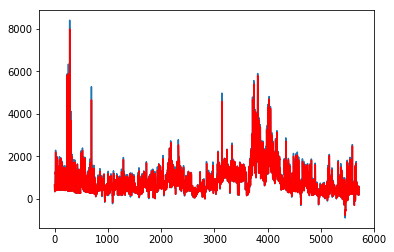

In [44]:
history = [x for x in ENSENADA_train]
predictions = list()
for t in range(len(ENSENADA_test)):
  # ARIMA hyperparameter configurations
    model = ARIMA(history, order=(0,1,1))
  # Train the model
    model_fit = model.fit(disp=0)
  # Forecast
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = ENSENADA_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# Error calculation by using MSE
error = mean_squared_error(ENSENADA_test, predictions)
print('Test MSE: %.3f' % error)
# Plot the result
plt.plot(ENSENADA_test)
plt.plot(predictions, color='red')
plt.show()

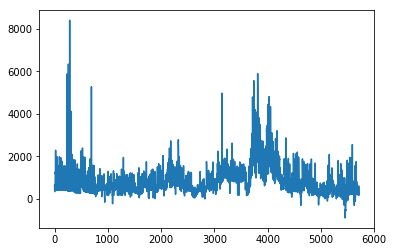

In [46]:
plt.plot(ENSENADA_test)

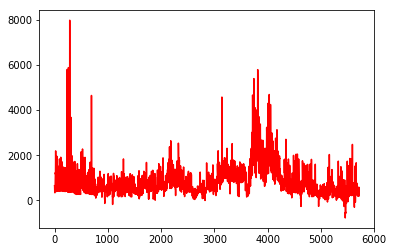

In [47]:
plt.plot(predictions, color='red')